# A Tale of Two Bounds

In [1]:
%matplotlib inline

import networkx as nx
import numpy as np
import matplotlib as mpl

from scipy import sparse
from scipy.sparse import csr_matrix

from matplotlib import pyplot as plt
from scipy.linalg import eigh as scipy_eigh
from numpy.linalg import eigh as numpy_eigh

from mixing_result_helpers import (
    load_example_graphs, conductance, init_p0, flatten, get_relevant_matrices,
    plot_Ct_list, plot_Ct_list_in_order,
    plot_Ut_list, plot_Ut_list_in_order,
    plot_curves, 
    Ut as loose_Ut
)    

In [41]:
figdir = '/home/cloud-user/documents/signed-local-community/figs/ppr-mixing/'

In [2]:
barbell_graph, line_graph, lattice, complete_graph = load_example_graphs()

In [3]:
def Ut_tight(x, t, m, phi, alpha, **kwargs):
    du = kwargs['du']
    pi_S = x / (4 * m)
    part1 = (1 - alpha) ** t
    part2 = np.sqrt(x / du) * ((1 - np.power(phi, 2) / 8) ** t) * ((1 - alpha) ** t)
    return pi_S + (1 - part1 + part2) * (1 - pi_S)

/home/cloud-user/code/signed/mixing_result_helpers.py:193: RuntimeWarning: divide by zero encountered in log2
  Ui = np.log2(Ui)


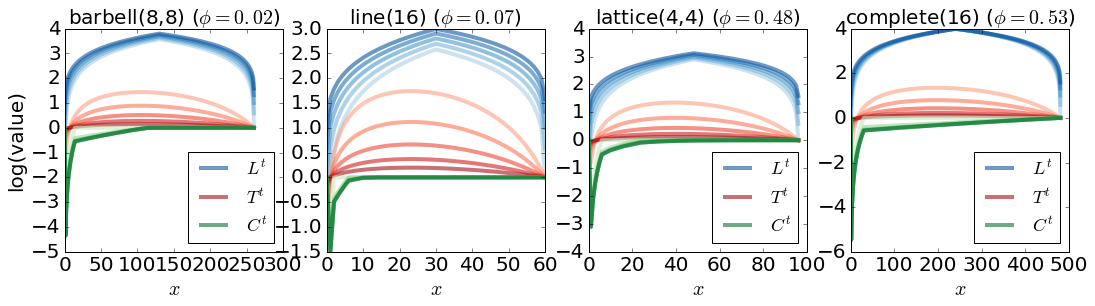

In [44]:
plt.style.use('remarkable')
k, step = 5, 1
use_log = True

fig, axes = plt.subplots(1, 4, figsize=(18, 4))

for i, g in enumerate([barbell_graph, line_graph, lattice, complete_graph]):
    ax = axes[i]
    seed, alpha = 0, 0.5
    deg_seed = g.degree(seed)
    p0 = init_p0(g, seed)
    n, m = g.number_of_nodes(), g.number_of_edges()
    Wl, sock = get_relevant_matrices(g)

    lines1 = plot_Ut_list_in_order(
        m, g.graph['phi'], alpha, Ut_func=loose_Ut, ax=ax,
        k=k, step=step,
        cm_name='Blues',
        log=use_log
    )
    lines2 = plot_Ut_list_in_order(
        m, g.graph['phi'], alpha, Ut_func=Ut_tight, ax=ax, du=deg_seed,
        k=k, step=step,
        cm_name='Reds',
        log=use_log
    )

    lines3 = plot_Ct_list_in_order(
        Wl, sock, p0, alpha, ax=ax, k=k, step=step, cm_name="Greens",
        log=use_log
    )
    if i != 1:
        ax.legend([lines1[-1], lines2[-1], lines3[-1]], ['$L^t$', '$T^t$', '$C^t$'], loc='lower right')
    ax.set_title('{} ($\phi={:.2f}$)'.format(g.graph['name'], g.graph['phi']))
    ax.set_xlabel('$x$')
    if i == 0:
        ax.set_ylabel('log(value)')
fig.savefig(figdir + '/all.png')    

# upperbounds on $\epsilon$ such that  $L^t_{\phi+\epsilon}$ upper bounds $T^t_{\phi}$



In [13]:
def upperbound_on_epsilon(du, phi, c, t):
    return np.sqrt(8 - 8 * (du ** (- 1 / 2 / t) * (1 - phi ** 2 / 8) * (1 - c))) - phi    

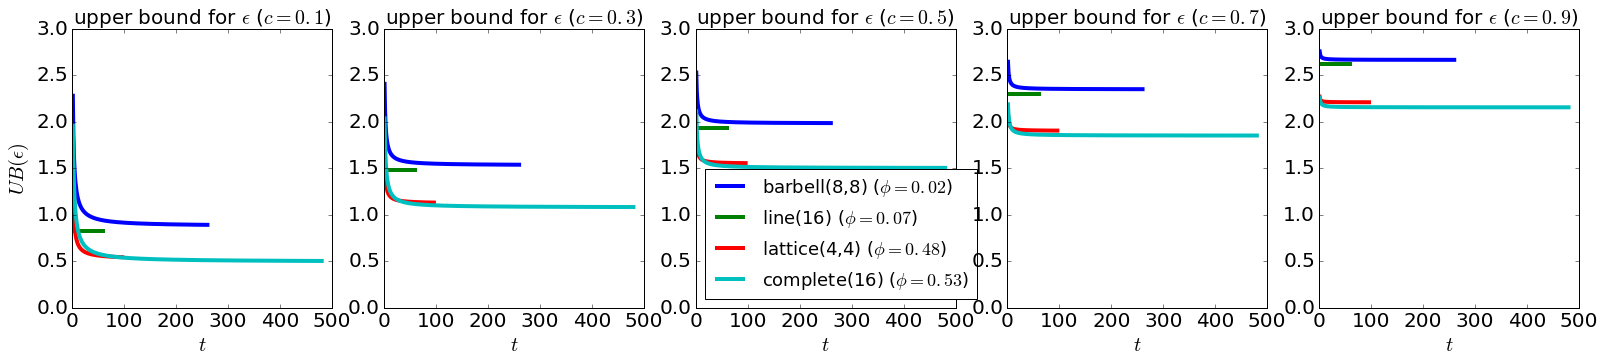

In [38]:
c_list = [0.1, 0.3, 0.5, 0.7, 0.9]
n_subplots = len(c_list)
fig, axes = plt.subplots(1, n_subplots, figsize=(5 * n_subplots + 2, 5))

for j, c in enumerate(c_list):
    ax = axes[j]
    labels = []
    for i, g in enumerate([barbell_graph, line_graph, lattice, complete_graph]):
        du = g.degree(seed)
        m = g.number_of_edges()
        t = np.arange(1, 4 * m + 1)
        phi = g.graph['phi']
        vals = upperbound_on_epsilon(du, phi, c, t)
        ax.plot(t, vals)
        labels.append("{} ($\phi={:.2f}$)".format(g.graph['name'], phi))
    ax.set_xlabel('$t$')    
    if j == 0:
        ax.set_ylabel('$UB(\epsilon)$')
    ax.set_title('upper bound for $\epsilon$ ($c={:.1f}$)'.format(c))
    ax.set_ylim(0, 3)
    if j == 2:
        ax.legend(labels, loc='best')